In [4]:
import pickle
import pandas as pd
import numpy as np
import random
#from sklearn import linear_model
#from sklearn import naive_bayes
from sklearn import tree
from matplotlib import pyplot as plt


In [5]:
%matplotlib notebook

In [3]:
results = pd.read_csv('~/repos/parking/BANES_Historic_Car_Park_Occupancy.csv', engine='c', parse_dates=['LastUpdate'], dayfirst=True)


FileNotFoundError: File b'/media/128G/bathhacked/BANES_Historic_Car_Park_Occupancy.csv' does not exist

In [4]:
results.reset_index()
results['LastUpdate2'] = results['LastUpdate']
results = results.set_index('LastUpdate')
results = results.sort_index()

<IPython.core.display.Javascript object>


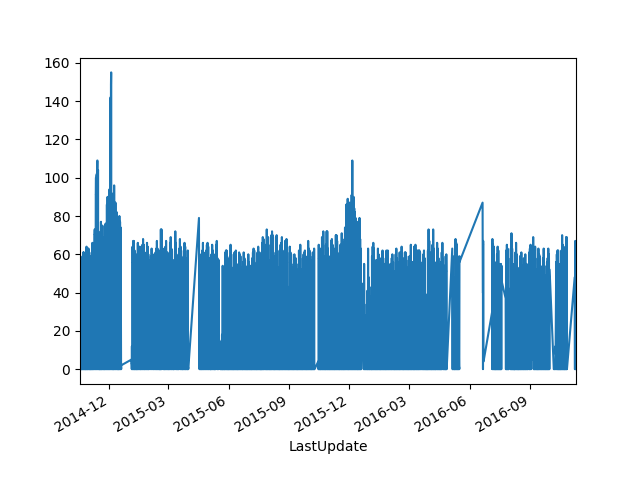

In [78]:
results = results[results['Name'] == "Odd Down P+R"]
fig1 = plt.figure()
results['Percentage'].plot()

In [6]:
def hr_func(ts):
    return ts.hour

results['time_hour'] = results['LastUpdate2'].apply(hr_func)

def min_func(ts):
    return ts.minute

results['time_min'] = results['LastUpdate2'].apply(min_func)

In [7]:
def day_of_month(ts):
    return ts.day

results['day_of_month'] = results['LastUpdate2'].apply(day_of_month)

In [8]:
def month(ts):
    return ts.month

results['month'] = results['LastUpdate2'].apply(month)

def year(ts):
    return ts.year

results['year'] = results['LastUpdate2'].apply(year)

def weekday(ts):
    return ts.weekday()

results['weekday'] = results['LastUpdate2'].apply(weekday)

In [9]:
training = results[(results['year'] <= 2015) | ((results['year'] == 2016) & (results['month'] < 9))]
test = results[(results['year'] == 2016) & (results['month'] >= 9)]

feature_names = ['year','month','day_of_month','weekday','time_hour','time_min']

train_features = training[feature_names]
train_occupancy = training['Percentage']
test_features = test[feature_names]
test_occupancy = test['Percentage']

In [72]:
#regressor = linear_model.LinearRegression()
#regressor = naive_bayes.GaussianNB()
regressor = tree.DecisionTreeRegressor(max_depth=10)

regressor.fit( train_features, train_occupancy)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [73]:
predictions = regressor.predict(test_features)
#predictions.size
test['prediction'] = predictions

test

/home/tom/.pyenv/versions/3.5.2/envs/betfair-python3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,ID,Name,Description,Capacity,Status,Occupancy,Percentage,Easting,Northing,DateUploaded,Location,LastUpdate2,time_hour,time_min,day_of_month,month,year,weekday,prediction
LastUpdate,,,,,,,,,,,,,,,,,,,
2016-09-01 00:03:50,66cb86348a7577eca71d58499882af8d,Odd Down P+R,Odd Down P+R / A367 / P+R / Bath,1252,Static,20,2,373363.0,161610.0,01/09/2016 12:05:02 AM,"(51.352935229, -2.38389427175)",2016-09-01 00:03:50,0,3,1,9,2016,3,0.000000
2016-09-01 00:09:50,717440be9b086933fe6b2d4e18afc68c,Odd Down P+R,Odd Down P+R / A367 / P+R / Bath,1252,Static,20,2,373363.0,161610.0,01/09/2016 12:10:01 AM,"(51.352935229, -2.38389427175)",2016-09-01 00:09:50,0,9,1,9,2016,3,0.000000
2016-09-01 00:11:50,1c7ff064e6a87da02aaf183a28bcac7b,Odd Down P+R,Odd Down P+R / A367 / P+R / Bath,1252,Static,20,2,373363.0,161610.0,01/09/2016 12:15:02 AM,"(51.352935229, -2.38389427175)",2016-09-01 00:11:50,0,11,1,9,2016,3,0.000000
2016-09-01 00:19:51,da0405866309014de7843e7c451c9362,Odd Down P+R,Odd Down P+R / A367 / P+R / Bath,1252,Static,20,2,373363.0,161610.0,01/09/2016 12:20:01 AM,"(51.352935229, -2.38389427175)",2016-09-01 00:19:51,0,19,1,9,2016,3,0.000000
2016-09-01 00:23:51,4e1c829caf7293b11f4fef50e2baab98,Odd Down P+R,Odd Down P+R / A367 / P+R / Bath,1252,Static,20,2,373363.0,161610.0,01/09/2016 12:25:02 AM,"(51.352935229, -2.38389427175)",2016-09-01 00:23:51,0,23,1,9,2016,3,0.000000
2016-09-01 00:29:51,fdbbb6c7ce401f5b7d404c856ee57a60,Odd Down P+R,Odd Down P+R / A367 / P+R / Bath,1252,Static,20,2,373363.0,161610.0,01/09/2016 12:30:02 AM,"(51.352935229, -2.38389427175)",2016-09-01 00:29:51,0,29,1,9,2016,3,0.000000
2016-09-01 00:33:50,f4eddb457b7b3d9d8856a43d91c547ed,Odd Down P+R,Odd Down P+R / A367 / P+R / Bath,1252,Static,20,2,373363.0,161610.0,01/09/2016 12:35:01 AM,"(51.352935229, -2.38389427175)",2016-09-01 00:33:50,0,33,1,9,2016,3,0.000000
2016-09-01 00:39:52,be5bb9e937aba0dfe7b7241261423c6b,Odd Down P+R,Odd Down P+R / A367 / P+R / Bath,1252,Static,20,2,373363.0,161610.0,01/09/2016 12:40:01 AM,"(51.352935229, -2.38389427175)",2016-09-01 00:39:52,0,39,1,9,2016,3,0.000000
2016-09-01 00:43:51,6f62c55622cbc7609a8620daf6f1ff24,Odd Down P+R,Odd Down P+R / A367 / P+R / Bath,1252,Static,20,2,373363.0,161610.0,01/09/2016 12:45:01 AM,"(51.352935229, -2.38389427175)",2016-09-01 00:43:51,0,43,1,9,2016,3,0.000000


In [74]:
# The coefficients
print('Coefficients: \n', list(zip(feature_names, regressor.coef_)))

AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

In [75]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regressor.predict(test_features) - test_occupancy) ** 2))

Mean squared error: 11.00


In [76]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(test_features, test_occupancy))

Variance score: 0.98


<IPython.core.display.Javascript object>


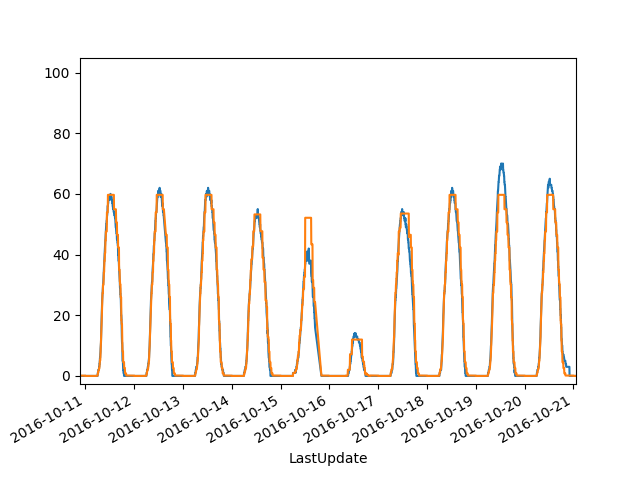

In [77]:
fig2 = plt.figure()
test['Percentage'].plot()
test['prediction'].plot()

In [71]:
tree.export_graphviz(regressor, out_file='depth2.dot')  